# GOPH 457 Assignment 4 : Question 2

# Gassman's relations for fluid substitution problem

## Under water saturated condition,

P-wave velocity, Vp = 3.80 km/s

S-wave velocity, Vs = 2.16 km/s

Bulk density, ρB = 2.33 g/cm^3

Porosity, ∅ = 0.18

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## STEP 1 : Calculate Ksat and G

$ \Large K_{sat} = \rho_B \left(V_P - \frac{4}{3} V_S^2 \right) $

$ \Large G = V_S^2 \rho_B $

where  

       Ksat is saturated bulk modulus (GPa or Pa)
       G is shear modulus (GPa or Pa)

In [2]:
vp = 3800
vs = 2160 
rho_b = 2330

K_sat = (rho_b * (vp ** 2 - 4 * vs ** 2 / 3)) / 10 ** 9

G = (vs ** 2 * rho_b) / 10 ** 9

print('The bulk modulus for the fully saturated rock is ' + str("{:.2f}".format(K_sat)) + ' GPa')
print('The shear modulus for the fully saturated rock is ' + str("{:.2f}".format(G)) + ' GPa')

The bulk modulus for the fully saturated rock is 19.15 GPa
The shear modulus for the fully saturated rock is 10.87 GPa


## STEP 2 : Calculate ρs

$ \Large \rho_B = \rho_S (1 - \phi) + \rho_f \phi $

$ \Large \rho_S = \frac{\rho_B - \rho_f \phi}{1 - \phi} $

where  

       𝜌S is density of rock mineral (kg/m^3)
       𝜌f is density of fluid (kg/m^3)

Since the rock is saturated with water, 𝜌f = 1000 kg/m^3.

In [3]:
rho_water = 1000
por = 0.18

rho_s = (rho_b - rho_water * por) / (1 - por)

print('The density of the rock mineral is ' + str("{:.0f}".format(rho_s)) + ' kg/m^3')

The density of the rock mineral is 2622 kg/m^3


## STEP 3 : Estimate Ks based on lithology estimates

G = 10.87 GPa and ρs = 2622 kg/m^3.

Based on the shear modulus and density of the mineral, the mineral can be estimated to be an “average” feldspar with mineral bulk modulus, Ks of 37.5 GPa. 

(Taken from Carmichael, 1989)

## STEP 4 : Find Kf for water

Bulk modulus for water, Kf = Kwater = 2.15 GPa (Taken from https://www.engineeringtoolbox.com/bulk-modulus-elasticity-d_585.html)

## STEP 5 : Calculate K*

$ \Large K^* = \frac{K_{sat} \left(\frac{\phi K_S}{K_f} + 1 - \phi \right) - K_S}{\frac{\phi K_S}{K_f} + \frac{K_{sat}}{K_S} - 1 - \phi} $

where  

       K* is bulk modulus of dry rock (GPa or Pa)
       Ks is mineral bulk modulus (GPa or Pa)
       Kf is fluid bulk modulus (GPa or Pa)

In [4]:
K_water = 2.15
K_s = 37.5

K_star = (K_sat * (por * K_s / K_water + 1 - por) - K_s) / (por * K_s / K_water + K_sat / K_s - 1 - por)

print('The bulk modulus for the dry rock is ' + str("{:.2f}".format(K_star)) + ' GPa')

The bulk modulus for the dry rock is 15.52 GPa


## STEP 6 : Calculate new Kf and 𝜌f based on oil-water saturation

$ \Large K_{f,new} = \left(\frac{f_{oil}}{K_{oil}} + \frac{f_{water}}{K_{water}} \right) ^ {-1} $

$ \Large \rho_{f,new} = f_{oil} \rho_{oil} + f_{water} \rho_{water} $

where

    Kf,new is new fluid bulk modulus
    𝜌f,new is new fluid density
    foil is fraction of oil
    fwater is fraction of water

In [6]:
K_oil = 1.66
rho_oil = 850

saturation_range = np.linspace(0, 1, 10000)

vp_values = []
vs_values = []

table1 = pd.DataFrame(columns=['Oil %', 'Water %', 'Kf (GPa)', 'ρf (kg/m^3)'])
table2 = pd.DataFrame(columns=['Oil %', 'Water %', 'Ksat (GPa)', 'ρB (kg/m^3)'])
table3 = pd.DataFrame(columns=['Oil %', 'Water %', 'Vp (m/s)', 'Vs (m/s)'])

for oil_fraction in saturation_range:
    
    water_fraction = 1 - oil_fraction
    
    oil_percent = oil_fraction * 100
    water_percent = water_fraction * 100
    
    K_f_new = (oil_fraction / K_oil + (water_fraction) / K_water) ** -1
    
    rho_f_new = oil_fraction * rho_oil + (water_fraction) * rho_water
    
    K_sat_new = K_star + (1 - K_star / K_s) ** 2 / (por / K_f_new + (1 - por) / K_s - K_star / K_s ** 2)
    
    rho_b_new = rho_s * (1 - por) + rho_f_new * por
    
    vp_new = np.sqrt((K_sat_new * 10 ** 9 + 4 * G * 10 ** 9 / 3) / rho_b_new)
    vp_values.append(vp_new)
    
    vs_new = np.sqrt(G * 10 ** 9 / rho_b_new)
    vs_values.append(vs_new)
    
    
    table1 = table1.append({'Oil %': oil_percent, 'Water %': water_percent, 'Kf (GPa)': K_f_new, 
                            'ρf (kg/m^3)': rho_f_new}, ignore_index=True)
    table2 = table2.append({'Oil %': oil_percent, 'Water %': water_percent, 'Ksat (GPa)': K_sat_new, 
                            'ρB (kg/m^3)': rho_b_new}, ignore_index=True)
    table3 = table3.append({'Oil %': oil_percent, 'Water %': water_percent, 'Vp (m/s)': vp_new, 
                            'Vs (m/s)': vs_new}, ignore_index=True)
    
print(table1)

           Oil %     Water %  Kf (GPa)  ρf (kg/m^3)
0       0.000000  100.000000  2.150000  1000.000000
1       0.010001   99.989999  2.149937   999.984998
2       0.020002   99.979998  2.149873   999.969997
3       0.030003   99.969997  2.149810   999.954995
4       0.040004   99.959996  2.149746   999.939994
...          ...         ...       ...          ...
9995   99.959996    0.040004  1.660151   850.060006
9996   99.969997    0.030003  1.660114   850.045005
9997   99.979998    0.020002  1.660076   850.030003
9998   99.989999    0.010001  1.660038   850.015002
9999  100.000000    0.000000  1.660000   850.000000

[10000 rows x 4 columns]


## STEP 7 : Calculate new Ksat and 𝜌B using new Kf and 𝜌f respectively

$ \Large K_{sat,new} = K^* + \frac{\left(1 - \frac{K^*}{K_S} \right) ^ 2}{\frac{\phi}{K_{f,new}} + \frac{1 - \phi}{K_S} - \frac{K^*}{K_S^2}} $

$ \Large \rho_{B,new} = \rho_S (1 - \phi) + \rho_{f,new} \phi $

where

    Ksat,new is new saturated bulk modulus of rock
    𝜌B,new is new bulk density of rock

In [7]:
print(table2)

           Oil %     Water %  Ksat (GPa)  ρB (kg/m^3)
0       0.000000  100.000000   19.150736  2330.000000
1       0.010001   99.989999   19.150641  2329.997300
2       0.020002   99.979998   19.150546  2329.994599
3       0.030003   99.969997   19.150451  2329.991899
4       0.040004   99.959996   19.150356  2329.989199
...          ...         ...         ...          ...
9995   99.959996    0.040004   18.397840  2303.010801
9996   99.969997    0.030003   18.397780  2303.008101
9997   99.979998    0.020002   18.397721  2303.005401
9998   99.989999    0.010001   18.397661  2303.002700
9999  100.000000    0.000000   18.397601  2303.000000

[10000 rows x 4 columns]


## STEP 8 : Calculate new Vp and Vs using new Ksat and 𝜌B

$ \Large V_{P,new} = \sqrt \frac{K_{sat,new} + \frac{4}{3} G}{\rho_{B,new}} $

$ \Large V_{S,new} = \sqrt \frac{G}{\rho_{B,new}} $

where

    Vp is new P-wave velocity
    Vs is new S-wave velocity
    
    
The bulk modulus for oil, Koil = 1.66 GPa (Taken from https://www.engineeringtoolbox.com/bulk-modulus-elasticity-d_585.html)

The density of oil, 𝜌oil = 850 kg/m^3 (Taken from https://www.chemicalbook.com/ChemicalProductProperty_EN_CB5266104.htm)

In [8]:
print(table3)

           Oil %     Water %     Vp (m/s)     Vs (m/s)
0       0.000000  100.000000  3800.000000  2160.000000
1       0.010001   99.989999  3799.996837  2160.001252
2       0.020002   99.979998  3799.993674  2160.002503
3       0.030003   99.969997  3799.990511  2160.003755
4       0.040004   99.959996  3799.987349  2160.005007
...          ...         ...          ...          ...
9995   99.959996    0.040004  3779.193778  2172.619756
9996   99.969997    0.030003  3779.192562  2172.621029
9997   99.979998    0.020002  3779.191347  2172.622303
9998   99.989999    0.010001  3779.190132  2172.623577
9999  100.000000    0.000000  3779.188917  2172.624850

[10000 rows x 4 columns]


## STEP 7 : Plot Vp and Vs as a function of oil-water saturation

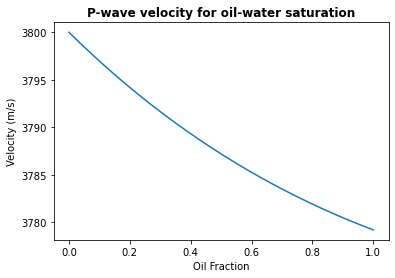

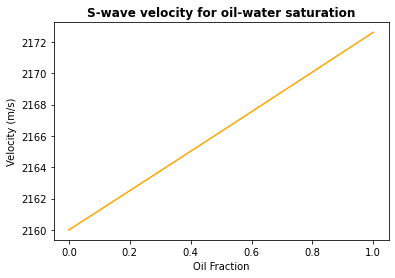

In [9]:
plt.figure
plt.plot(saturation_range, vp_values)
plt.title('P-wave velocity for oil-water saturation', fontweight = "bold")
plt.xlabel('Oil Fraction') 
plt.ylabel('Velocity (m/s)') 

plt.figure()
plt.plot(saturation_range, vs_values, 'orange')
plt.title('S-wave velocity for oil-water saturation', fontweight = "bold")
plt.xlabel('Oil Fraction') 
plt.ylabel('Velocity (m/s)');